In [37]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import numpy as np
%matplotlib inline

a4_dims = (15, 8.4375)

In [38]:
player_stats = pd.read_csv('D-League.csv')
player_stats.head()

,Player,Split,Team,GP,GS,Min,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,PF,TOV,PTS
0,Semaj Christon,G League Regular Season Stats,OKC,48,44,35.2,6.8,15.8,0.430,0.3,1.1,0.269,4.8,6.0,0.786,0.8,2.9,3.7,5.6,1.6,0.2,2.4,3.2,18.6
1,Luke Babbitt,G League Regular Season Stats,IDA,17,12,30.1,7.1,14.1,0.500,1.4,3.5,0.407,4.7,5.4,0.870,2.2,5.4,7.6,1.8,0.9,0.5,2.4,1.8,20.2
2,Miles Plumlee,G League Regular Season Stats,All Teams,17,14,28.7,4.6,10.1,0.456,0.0,0.0,0.000,1.1,2.1,0.500,3.3,6.1,9.4,1.1,0.8,1.8,2.6,2.5,10.2
3,Shane Larkin,G League Regular Season Stats,TEX,4,3,35.7,5.5,11.8,0.468,2.0,3.5,0.571,2.2,2.8,0.818,0.5,4.8,5.2,8.2,2.0,0.0,2.2,3.5,15.2
4,Abdel Nader,G League Regular Season Stats,MNE,44,44,33.8,7.3,16.5,0.444,2.5,7.0,0.353,4.1,5.2,0.798,0.8,5.4,6.1,3.7,1.0,0.9,2.5,3.6,21.3


In [39]:
stats_clean = player_stats.copy()

# What type of players are coming out of the G-League?

In [40]:
pd.set_option('display.max_columns', None)
stats_clean.describe()

,GP,GS,Min,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,PF,TOV,PTS
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.00000,178.000000,178.000000
mean,26.022472,21.112360,31.236517,6.240449,13.173596,0.479011,1.224157,3.539326,0.287927,3.012360,4.005056,0.740039,1.812360,4.774157,6.586517,3.198876,1.193258,0.960674,2.77191,2.458427,16.715730
std,26.528091,22.268489,5.195094,1.766046,3.541797,0.078795,1.108228,2.681665,0.149398,1.403613,1.750812,0.149112,1.205948,1.652700,2.512463,2.453960,0.677115,0.893873,0.84070,0.911051,4.807407
min,1.000000,0.000000,13.400000,1.000000,5.100000,0.083000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000,1.500000,0.000000,0.000000,0.000000,0.30000,0.000000,6.000000
25%,6.000000,5.000000,28.325000,5.025000,11.025000,0.437250,0.300000,1.025000,0.231000,2.000000,2.800000,0.691250,0.900000,3.600000,4.600000,1.425000,0.700000,0.225000,2.20000,1.900000,13.225000
50%,17.000000,14.000000,31.900000,6.100000,13.200000,0.471500,1.000000,3.450000,0.330500,3.000000,4.000000,0.762000,1.500000,4.650000,6.400000,2.350000,1.100000,0.600000,2.70000,2.300000,16.600000
75%,40.000000,29.750000,34.950000,7.100000,15.600000,0.523750,1.900000,5.275000,0.380000,3.900000,5.175000,0.822500,2.675000,5.900000,8.375000,4.525000,1.500000,1.500000,3.20000,2.975000,19.500000
max,145.000000,102.000000,43.400000,12.000000,24.000000,0.805000,7.000000,13.000000,0.667000,7.000000,9.200000,1.000000,6.500000,10.600000,16.000000,12.000000,4.000000,4.000000,5.00000,6.300000,32.000000


Some quick and easy takeaways from the simple statistics from the D-League:
    - Players getting called up are scoring well, with an average hovering around 16 points a game
    - They're playing significant minutes, an easy assumption
    - They're scoring efficently, slightly higher than the D-League and NBA averages (FG%)

I have some hunches about a high volume of "3 and D" guys coming out of the D-League so I decided to check out what the 3 point shooting percentage distribution looked like. 

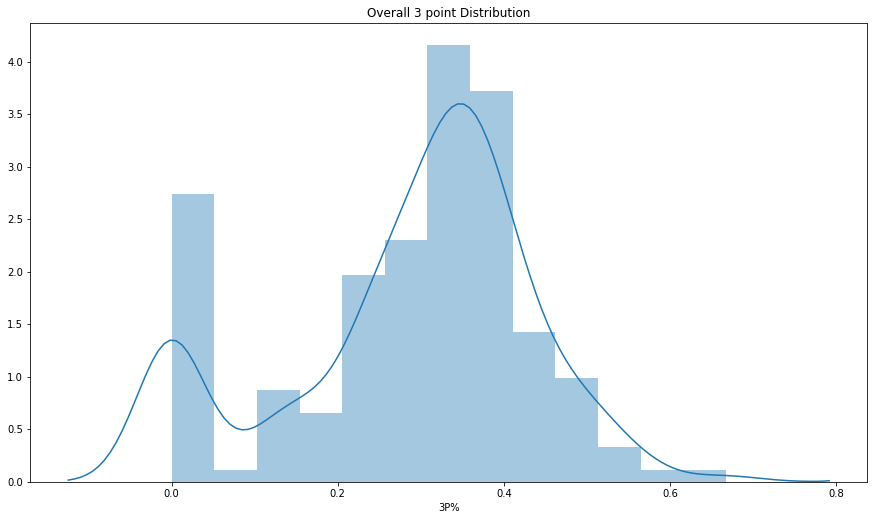

In [41]:
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.distplot(stats_clean['3P%'], ax=ax)
ax.set_title('Overall 3 point Distribution')

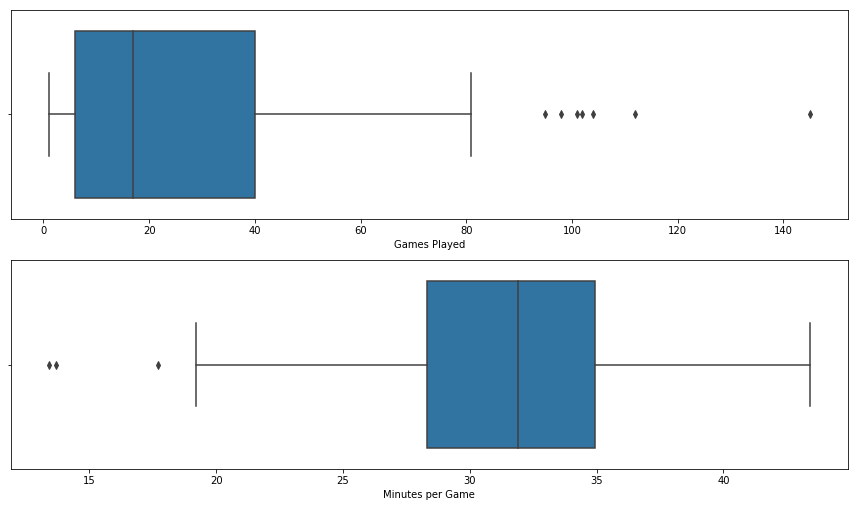

In [42]:
f, (ax1, ax2) = pyplot.subplots(2, figsize=a4_dims)
sns.boxplot(x='GP', data=stats_clean, ax=ax1)
sns.boxplot(x='Min', data=stats_clean, ax=ax2)
ax1.set(xlabel='Games Played')
ax2.set(xlabel='Minutes per Game')

After plotting the amount of game played and the minutes distribution, we can see that players are likely recognized as NBA worthy players right around that 18-20 game mark in the D-League. It also makes intuitive sense that these players are playing a lot of minutes in the D-League games. 

Let us look at some of the correlations between variables below before we start clustering players. I want to cluster these players to see what types of players are coming out of the D-League. 

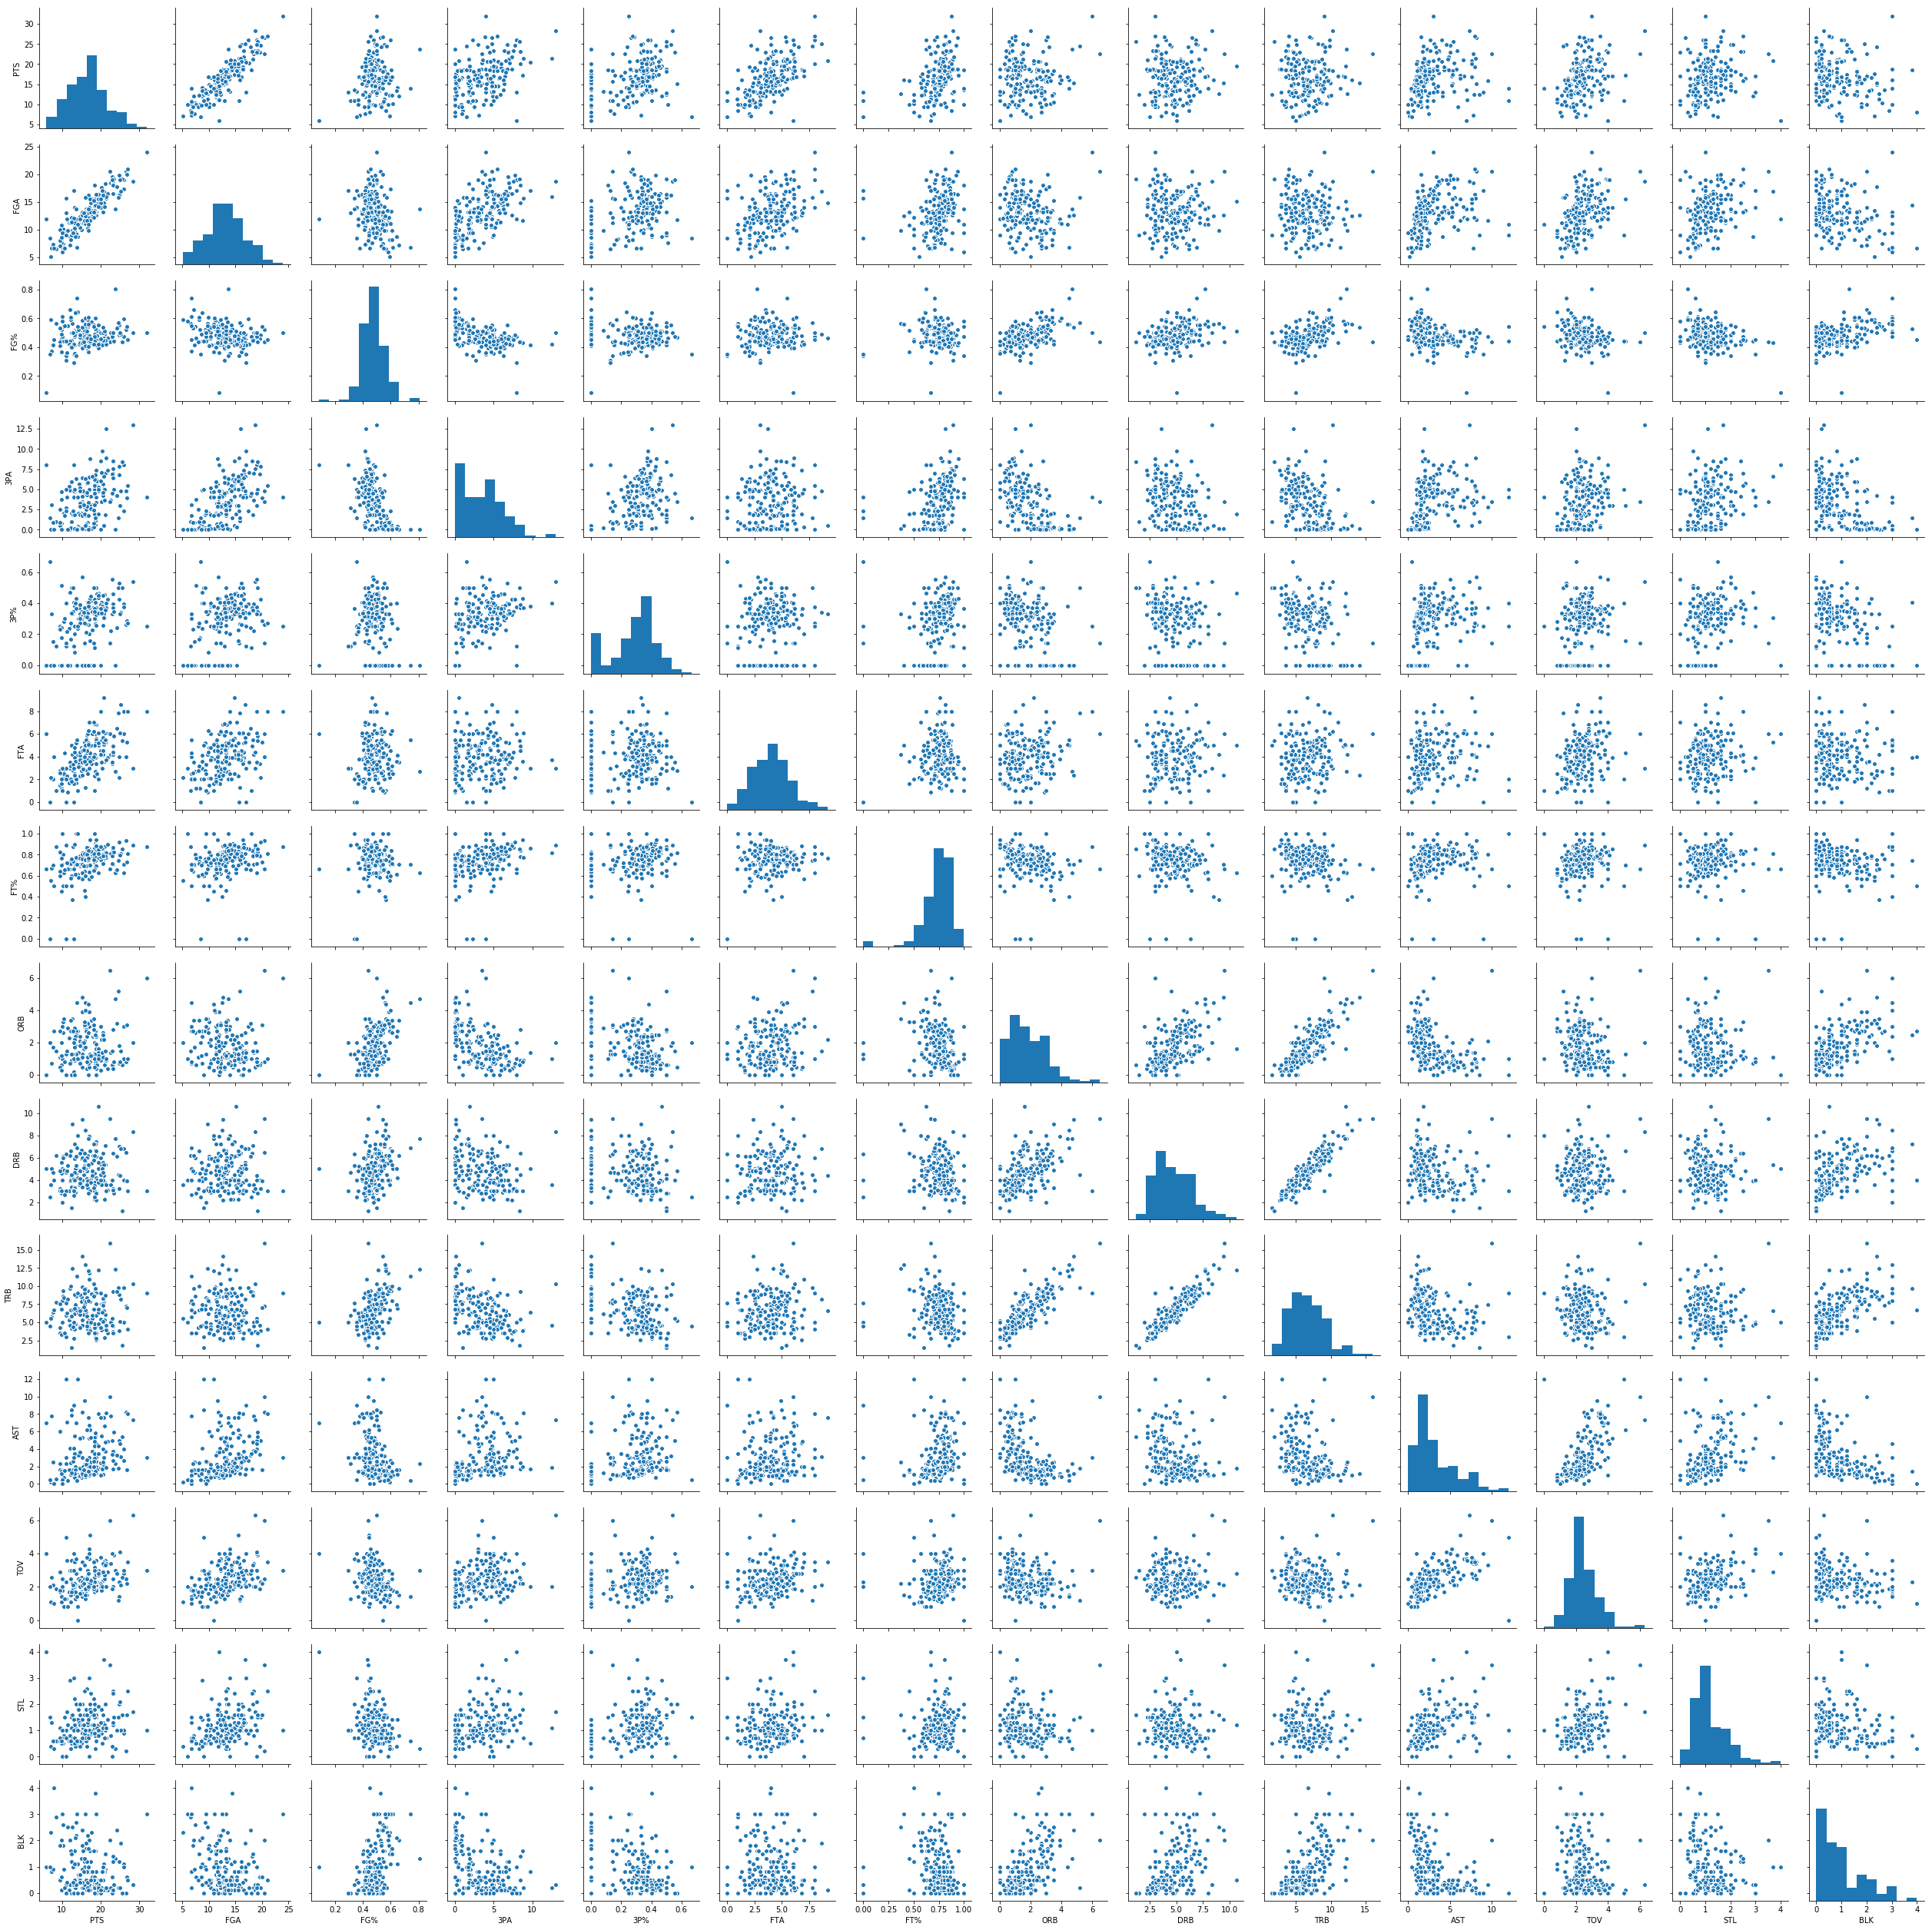

In [43]:
correl_cols = ['PTS', 'FGA', 'FG%', '3PA', '3P%', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',\
               'TOV', 'STL', 'BLK']
sns.pairplot(stats_clean[correl_cols])

I'm going to remove total rebounds because its highly correlated with DRB and ORB (repetitive). Let's observe our data using PCA. 

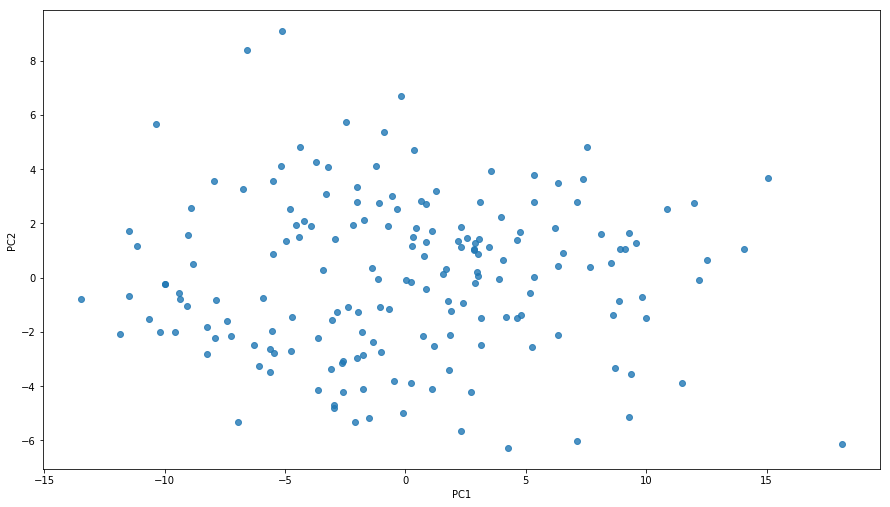

In [44]:
from sklearn import decomposition

cols_to_keep = ['PTS', 'FGA', 'FG%', '3PA', '3P%', 'FTA', 'FT%', 'ORB', 'DRB', 'AST', 'TOV', 'STL', 'BLK']
stats_clean = player_stats[cols_to_keep]

np.random.seed(3)

pca = decomposition.PCA(n_components=2)
pca.fit(stats_clean)
stats_pca = pca.transform(stats_clean)

stats_pca = pd.DataFrame(stats_pca)
stats_pca.columns = ['PC1', 'PC2']

fig, ax = pyplot.subplots(figsize=a4_dims)
sns.regplot(x='PC1', y='PC2', data=stats_pca, fit_reg=False)

We use Principal Component Analysis here to reduce the dimensionality of our data and find the variations in our dataset. However, we can't draw and hypotheses or conclusions from the PCA graph above. 

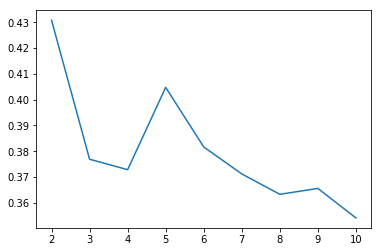

In [45]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

def silhouette(df, n):
    np.random.seed(5)
    sil_coeff = []
    k_values = range(2, n)
    for n_cluster in k_values:
        kmeans = KMeans(n_clusters=n_cluster).fit(df)
        label = kmeans.labels_
        sil_coeff.append(silhouette_score(df, label, metric='euclidean'))
    pyplot.plot(k_values, sil_coeff)
    pyplot.show()

#silhouette(stats_clean, 11)
silhouette(stats_pca, 11)

Measuring what the best k for our k-means using the Silhouette method. The value represents how similar an object is to its own cluster compared to other clusters, using Euclidean distance in our case. We'll also try the elbow method below, which measures the percentage of variance as a function of the number of clusters. 

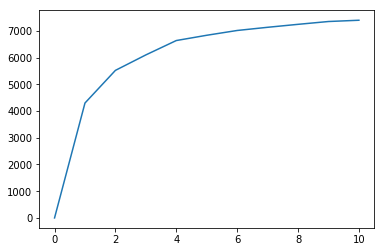

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist, pdist

def elbow(df, n):
    np.random.seed(5)
    kMeansVar = [KMeans(n_clusters=k).fit(df.values) for k in range(1, n)]
    centroids = [X.cluster_centers_ for X in kMeansVar]
    k_euclid = [cdist(df.values, cent) for cent in centroids]
    dist = [np.min(ke, axis=1) for ke in k_euclid]
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(df.values)**2)/df.values.shape[0]
    bss = tss - wcss
    plt.plot(bss)
    plt.show()

#elbow(stats_clean, 12)
elbow(stats_pca, 12)

One of the ways to determine the number of clusters to use is to compare the mean distance between data points and their cluster centroid for different values of k. After plotting this and using the "elbow" method (one in which we see that K will always increase along with the distance decreasing, so we take the point where it levels off sharply). From the above analysis, a k-value of 4 seems optimal. 

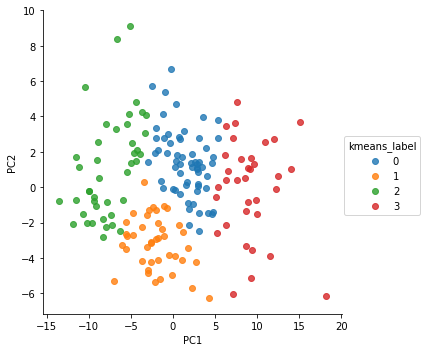

In [13]:
stats_kmeans = stats_pca.copy()
stats_kmeans = pd.concat([stats_kmeans, player_stats['Player']], axis=1)

kcols = ['PC1', 'PC2']
kmeans = KMeans(n_clusters=4, random_state=0).fit(stats_kmeans[kcols])

stats_kmeans['kmeans_label'] = kmeans.labels_

sns.lmplot(x='PC1', y='PC2', data=stats_kmeans, fit_reg=False, hue='kmeans_label')

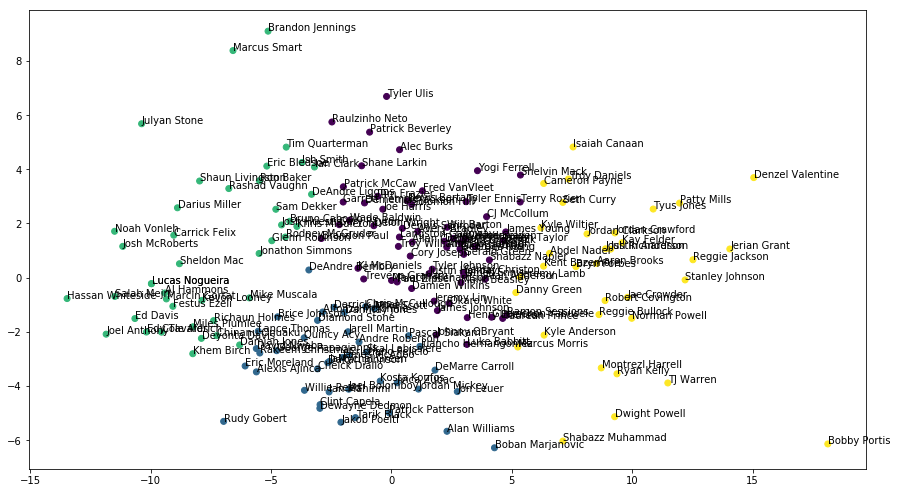

In [14]:
fig, ax = plt.subplots(figsize=a4_dims)
ax.scatter(x='PC1', y='PC2', data=stats_kmeans, c='kmeans_label')

for i, txt in enumerate(stats_kmeans.Player):
    ax.annotate( txt, ( stats_kmeans.PC1[i] + .01, stats_kmeans.PC2[i] + .01 ) )

plt.show()

In [15]:
df_kmeans_summary = player_stats.copy()
df_kmeans_summary = pd.concat([df_kmeans_summary, stats_kmeans['kmeans_label']], axis=1)

df_kmeans_summary.groupby(['kmeans_label']).mean()

,GP,GS,Min,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,PF,TOV,PTS
kmeans_label,,,,,,,,,,,,,,,,,,,,,
0,24.360656,19.704918,32.721311,6.229508,13.981967,0.447426,1.619672,4.709836,0.344984,3.377049,4.214754,0.798541,1.181967,4.331148,5.514754,4.126230,1.370492,0.473770,2.622951,2.665574,17.449180
1,33.439024,28.292683,29.970732,6.375610,11.946341,0.537829,0.339024,1.112195,0.206220,3.004878,4.400000,0.683098,2.892683,6.056098,8.939024,1.426829,0.953659,1.553659,3.236585,2.217073,16.097561
2,29.119048,21.285714,26.452381,4.159524,9.152381,0.469238,0.633333,2.147619,0.222738,1.659524,2.421429,0.660738,1.695238,4.254762,5.961905,2.709524,0.957143,1.254762,2.585714,2.050000,10.611905
3,16.235294,14.764706,36.008824,8.667647,18.170588,0.476824,2.311765,6.085294,0.364618,4.038235,5.108824,0.801706,1.785294,4.664706,6.444118,4.276471,1.455882,0.755882,2.708824,2.882353,23.685294


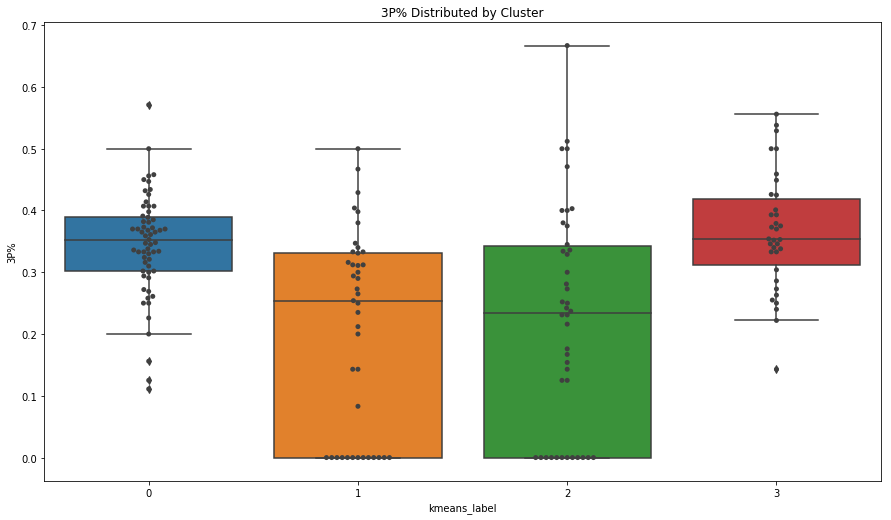

In [48]:
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x='kmeans_label', y='3P%', data=df_kmeans_summary)
sns.swarmplot(ax=ax, x='kmeans_label', y='3P%', data=df_kmeans_summary, color=".25")
ax.set_title('3P% Distributed by Cluster')

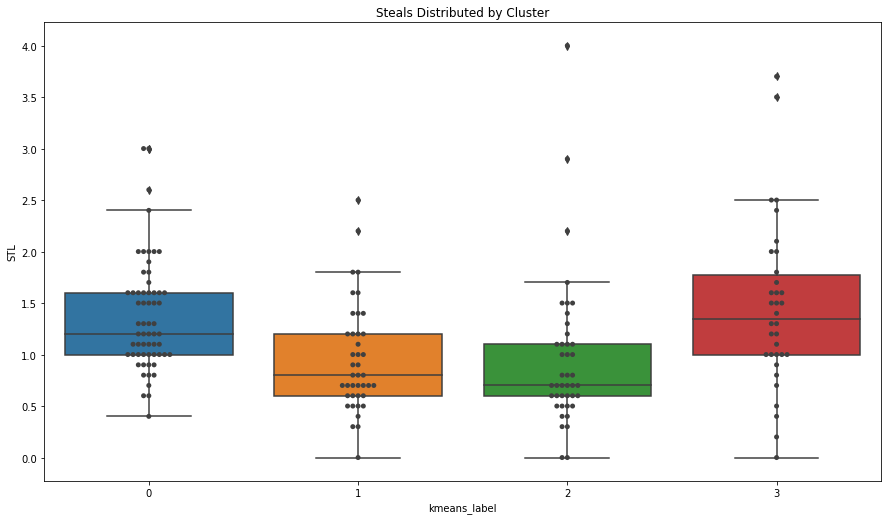

In [49]:
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x='kmeans_label', y='STL', data=df_kmeans_summary)
sns.swarmplot(ax=ax, x='kmeans_label', y='STL', data=df_kmeans_summary, color=".25")
ax.set_title('Steals Distributed by Cluster')

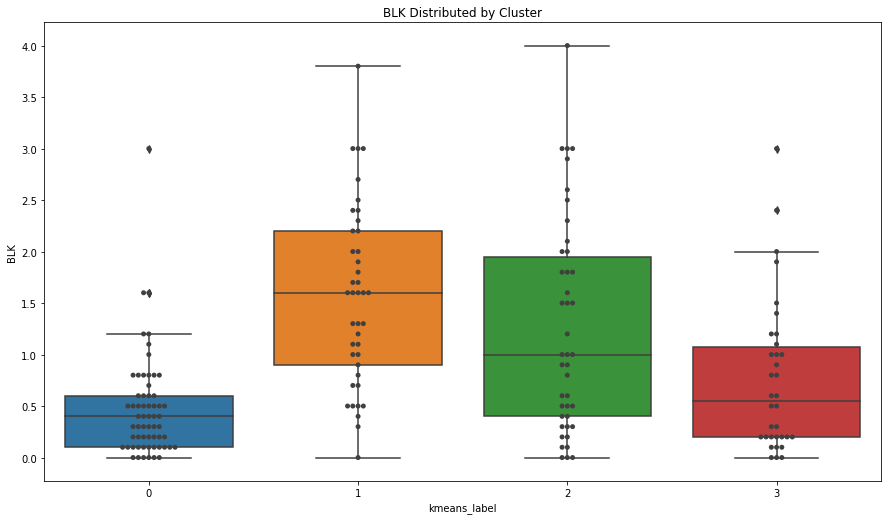

In [50]:
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x='kmeans_label', y='BLK', data=df_kmeans_summary)
sns.swarmplot(ax=ax, x='kmeans_label', y='BLK', data=df_kmeans_summary, color=".25")
ax.set_title('BLK Distributed by Cluster')

After analyzing each of the clusters, we take a look at how the players were categorized. Groups 0 and 3 both had higher volumes of players than groups 1 and 4, and represented a majority of the data. While no definitive conclusions were made, some of the things we can identify are below. 

1) Players with high 3% shooting percentages and high volumes of steals seem to be categorized together, and there are a much higher volume of players in these categories (0 and 3).

2) Group 3 seems to represent a better version of Group 1, with higher volumes of scoring to go along with higher shooting percentages.  

3) Groups 1 and 2 are largely made up of forwards and centers, with low FT%s and low 3P%s. The differences we can find between the 2 groups are interesting, as what one makes up in scoring the other makes up in passing(using AST statistics). It's likely that NBA teams are valuing larger bodies that can pass if they're scoring at a lower rate. 

Again, the data that we've used here are all the call-ups from the D-League (or the few players with smaller stints) that were on NBA Rosters on Opening Night. By team's discretions, these are likely to represent the most successful D-Leaguers. We could see early on that there was a large number of shooters representing the D-League alumni, and through clustering, we identified different groups of D-Leaguers that teams valued. We were able to gain some interesting insights. 

Let's bring in the NBA data! 

# Bringing in the NBA Data: How do they correlate? 

In [19]:
nba_stats = pd.read_csv('Seasons_Stats.csv')
keys = ['Player']
i1 = nba_stats.set_index(keys).index
i2 = player_stats.set_index(keys).index

#nba_stats.head()

In [20]:
nba_stats = nba_stats.drop(columns = ['ColumnID', 'Year', 'blanl', 'blank2', 'Age', 'Tm'])

nba_stats = nba_stats.add_prefix('NBA_')
nba_stats = nba_stats.rename(columns={'NBA_Player': 'Player'})
nba_stats.head()

,Player,NBA_Pos,NBA_G,NBA_GS,NBA_MP,NBA_PER,NBA_TS%,NBA_3PAr,NBA_FTr,NBA_ORB%,NBA_DRB%,NBA_TRB%,NBA_AST%,NBA_STL%,NBA_BLK%,NBA_TOV%,NBA_USG%,NBA_OWS,NBA_DWS,NBA_WS,NBA_WS/48,NBA_OBPM,NBA_DBPM,NBA_BPM,NBA_VORP,NBA_FG,NBA_FGA,NBA_FG%,NBA_3P,NBA_3PA,NBA_3P%,NBA_2P,NBA_2PA,NBA_2P%,NBA_eFG%,NBA_FT,NBA_FTA,NBA_FT%,NBA_ORB,NBA_DRB,NBA_TRB,NBA_AST,NBA_STL,NBA_BLK,NBA_TOV,NBA_PF,NBA_PTS
0,Curly Armstrong,G-F,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,Cliff Barker,SG,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,Leo Barnhorst,SF,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,Ed Bartels,F,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,Ed Bartels,F,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [21]:
nba_stats_average = nba_stats.groupby("Player").mean()
nba_stats_average['Player'] = nba_stats_average.index
nba_stats_average.head()
combined = pd.merge(nba_stats_average, player_stats, on='Player')
combined = combined[(combined.GP > 3) & (combined.NBA_G > 3) & (combined.NBA_PER < 25)]
combined.describe()

,NBA_G,NBA_GS,NBA_MP,NBA_PER,NBA_TS%,NBA_3PAr,NBA_FTr,NBA_ORB%,NBA_DRB%,NBA_TRB%,NBA_AST%,NBA_STL%,NBA_BLK%,NBA_TOV%,NBA_USG%,NBA_OWS,NBA_DWS,NBA_WS,NBA_WS/48,NBA_OBPM,NBA_DBPM,NBA_BPM,NBA_VORP,NBA_FG,NBA_FGA,NBA_FG%,NBA_3P,NBA_3PA,NBA_3P%,NBA_2P,NBA_2PA,NBA_2P%,NBA_eFG%,NBA_FT,NBA_FTA,NBA_FT%,NBA_ORB,NBA_DRB,NBA_TRB,NBA_AST,NBA_STL,NBA_BLK,NBA_TOV,NBA_PF,NBA_PTS,GP,GS,Min,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,PF,TOV,PTS
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,124.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,133.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,40.815256,10.506916,715.067656,11.633280,0.517034,0.286900,0.272103,5.147439,14.295195,9.723450,11.116877,1.605241,1.818862,13.775124,17.470741,0.524161,0.728172,1.253730,0.062633,-2.363283,-0.533036,-2.897650,0.144470,99.698063,222.847836,0.441085,22.904171,66.981111,0.281303,76.793892,155.866725,0.477513,0.487723,41.369147,56.583788,0.699562,30.597908,88.761457,119.359366,58.628496,23.135609,15.310950,37.140812,65.099184,263.669443,28.134328,22.873134,31.700746,6.262687,13.159701,0.480925,1.277612,3.579104,0.300328,3.121642,4.097761,0.755619,1.744030,4.703731,6.446269,3.088060,1.196269,0.914179,2.725373,2.371642,16.922388
std,17.578910,13.276228,478.321833,4.117089,0.077829,0.204680,0.148780,3.827152,5.773279,4.383198,7.774384,0.756425,1.708195,4.813811,4.146804,0.771482,0.606666,1.252913,0.066104,2.438019,1.734516,3.036600,0.498701,77.792557,173.115943,0.092093,25.726763,71.360766,0.113900,64.003178,125.895609,0.104479,0.082756,38.069458,50.938861,0.146179,32.306692,70.757949,100.253153,65.645761,17.881063,19.871572,30.481570,41.454980,206.262353,25.705618,21.205908,4.490717,1.548498,3.260313,0.066525,1.056995,2.627274,0.139376,1.329727,1.595410,0.104475,1.115476,1.564619,2.389880,2.167395,0.607399,0.831807,0.757587,0.753400,4.331241
min,3.500000,0.000000,24.000000,-1.200000,0.190000,0.000000,0.000000,0.000000,4.200000,3.100000,0.000000,0.000000,0.000000,0.000000,6.400000,-0.900000,0.000000,-0.400000,-0.211000,-17.300000,-6.900000,-24.100000,-1.100000,1.000000,3.500000,0.143000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.143000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,4.000000,0.000000,13.700000,2.500000,5.100000,0.357000,0.000000,0.000000,0.000000,0.600000,0.900000,0.369000,0.000000,1.200000,1.800000,0.200000,0.200000,0.000000,0.700000,0.800000,7.200000
25%,30.017857,1.000000,363.690476,9.534375,0.482125,0.120275,0.175500,2.178571,9.955833,6.249351,5.594444,1.181250,0.600000,10.792500,14.781250,0.001923,0.300000,0.262500,0.031893,-3.485625,-1.615000,-4.212500,-0.110714,42.875000,98.222222,0.390500,1.541667,6.500000,0.250000,32.357143,64.333333,0.427083,0.449047,14.750000,19.625000,0.630571,8.113636,36.500000,42.791667,16.666667,11.785714,3.481061,16.500000,33.875000,108.000000,9.000000,7.000000,29.075000,5.200000,11.225000,0.431250,0.425000,1.500000,0.250000,2.100000,2.800000,0.703500,0.800000,3.600000,4.500000,1.500000,0.700000,0.200000,2.200000,1.900000,13.950000
50%,41.025000,6.000000,678.102941,11.466667,0.519208,0.284500,0.243500,3.400000,12.864286,8.050000,8.379167,1.500000,1.377500,12.825000,17.503846,0.400000,0.583333,1.000000,0.069833,-2.062500,-0.383333,-2.588889,0.000000,85.833333,197.533333,0.429944,13.166667,42.916667,0.306889,64.500000,134.125000,0.475167,0.485470,31.083

With the above code, I've cleaned the data and combined a player's NBA career averages with his D-League career averages (into one readable row). We'll take a look to see if any of the statistics give us insight into what statistics translate into NBA success. We'll use Player Efficiency Rating, which accurately boils down all of a player's contributions into one metric. 

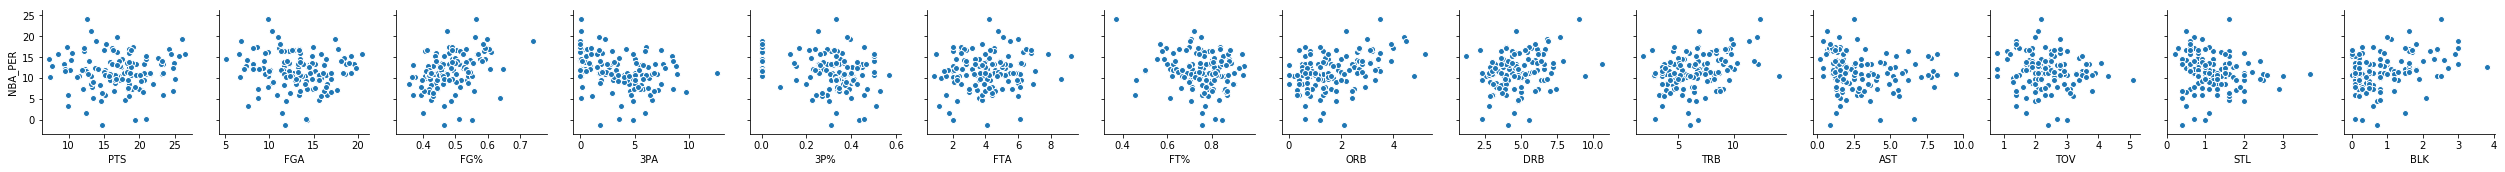

In [22]:
correl_cols = ['NBA_PER', 'PTS', 'FGA', 'FG%', '3PA', '3P%', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',\
               'TOV', 'STL', 'BLK']
sns.pairplot(combined, x_vars = ['PTS', 'FGA', 'FG%', '3PA', '3P%', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',\
               'TOV', 'STL', 'BLK'], y_vars = ['NBA_PER'])

After pairing all the D-League statistics with PER, we find that the two with the most linear correlations are FG% and the rebounding statistics. Let's take a closer look at the relations between ALL of the variables below. 

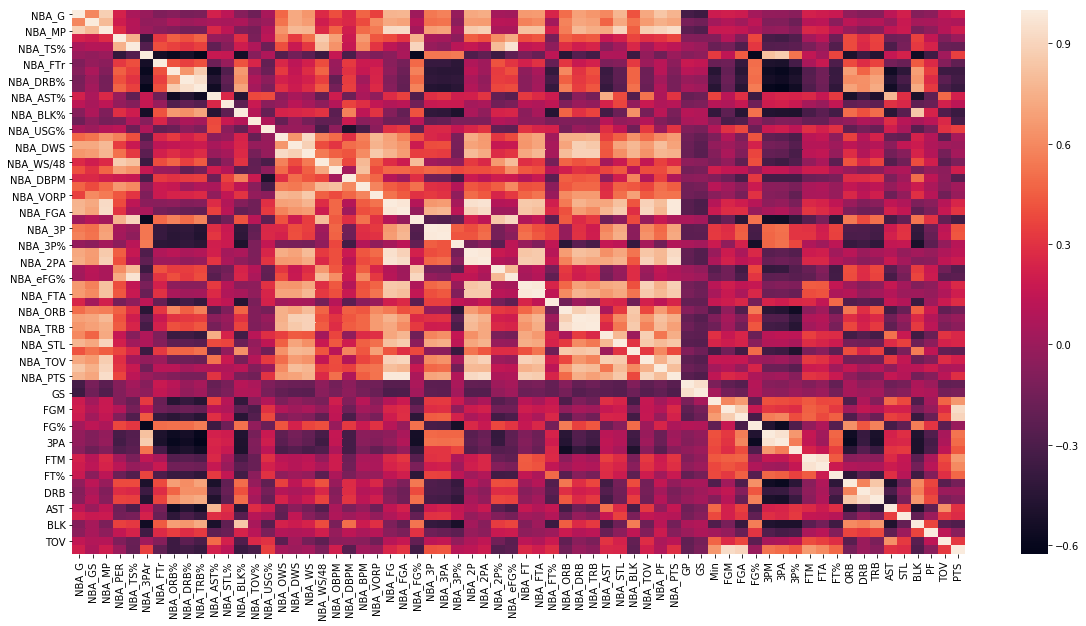

In [23]:
plt.figure(figsize=[20,10])
sns.heatmap(combined.corr())
plt.show()

In [24]:
c = combined.corr().abs()
#s = c.unstack()
#so = s.sort_values
pd.options.display.max_rows = 4000

names = c.columns
c = c.as_matrix()
corr_data = []
for i, row in enumerate(c):
    for j, val in enumerate(row):
        corr_data.append((names[i], names[j], c[i,j]))
        
corr_data = filter(lambda x: x[2] < 1.0, corr_data)
sorted(corr_data, key=lambda x: x[2], reverse=True)

[('NBA_FG', 'NBA_PTS', 0.99233092860837702),
 ('NBA_PTS', 'NBA_FG', 0.99233092860837702),
 ('NBA_3P', 'NBA_3PA', 0.99200085753738698),
 ('NBA_3PA', 'NBA_3P', 0.99200085753738698),
 ('NBA_FGA', 'NBA_PTS', 0.98819523250839059),
 ('NBA_PTS', 'NBA_FGA', 0.98819523250839059),
 ('NBA_DRB', 'NBA_TRB', 0.98775286152803077),
 ('NBA_TRB', 'NBA_DRB', 0.98775286152803077),
 ('NBA_2P', 'NBA_2PA', 0.98505669728235656),
 ('NBA_2PA', 'NBA_2P', 0.98505669728235656),
 ('NBA_FT', 'NBA_FTA', 0.98226783955815555),
 ('NBA_FTA', 'NBA_FT', 0.98226783955815555),
 ('NBA_FG', 'NBA_FGA', 0.9800408932925333),
 ('NBA_FGA', 'NBA_FG', 0.9800408932925333),
 ('NBA_FG', 'NBA_2PA', 0.9676299411138406),
 ('NBA_2PA', 'NBA_FG', 0.9676299411138406),
 ('NBA_TS%', 'NBA_eFG%', 0.96307971948382765),
 ('NBA_eFG%', 'NBA_TS%', 0.96307971948382765),
 ('FTM', 'FTA', 0.95886032298390578),
 ('FTA', 'FTM', 0.95886032298390578),
 ('3PM', '3PA', 0.95631198074638002),
 ('3PA', '3PM', 0.95631198074638002),
 ('NBA_FG', 'NBA_2P', 0.9526288263

Some cool insights! 

Here are some of the stronger correlations that we found! 
    - BLK to NBA_BLK%, 0.84239481925957616
    - AST to NBA_AST%, 0.78221222171437499
    - TRB to NBA_TRB%, 0.73244880107029886
    - BLK to NBA_TRB%, 0.72765165117183284
    - BLK to NBA_ORB%, 0.68159583074893348

Offensive rebounds, blocks, and assists in the D-League are good indicators of those same features in the NBA. All have correlations close to .8, significantly higher than any other of our D-League features. You can visualize the correlations in a very hectic chart above. 

Using some intuition, we can say that good passers in the D-League remain good passers in the NBA and good rebounders tend to rebound at similar rates. The same can't be said for scoring or shooting, as those do have correlations but they are significantly weaker. 

Let's see if we can predict a Player's Efficiency Rating with some of the different combinations we have below. 

0.419210984241
[ 23.31769007]
0.141959046824
[ 11.14534842]


/Users/neilnachnani/.local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


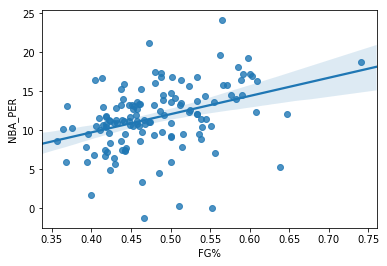

In [25]:
from sklearn.linear_model import LinearRegression

# create X and y
feature_cols = ['FG%']
a = combined[feature_cols]
b = combined.NBA_PER

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(a, b)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)
print(lm2.score(a, b))


print(lm2.predict(.46))

sns.regplot(x="FG%", y="NBA_PER", data=combined)

The association states that a .20 increase in PER is associated with a .01 increase in FG%. From the graph, we can also see that generating a .46 FG% in the D-League (the NBA average) can be translated into a slightly below average NBA Player (PER of 11.50). PER is designed to maintain a league-wide average of 15.00. However, with a low r-squared score, we're not going to give too much importance to this data (also looking at the least squares line). 

0.0994443686878
[ 0.71038198]
0.263332419274


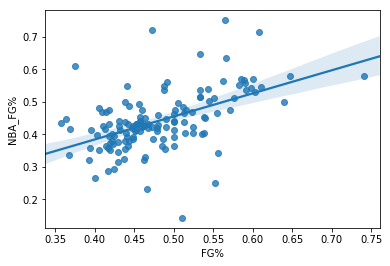

In [26]:
# create X and y
feature_cols = ['FG%']
a = combined[feature_cols]
b = combined['NBA_FG%']

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(a, b)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)
print(lm2.score(a, b))


sns.regplot(x="FG%", y="NBA_FG%", data=combined)

In [27]:
# create X and y
feature_cols = ['PTS', 'FGA', 'FG%', '3PA', '3P%', 'FTA', 'FT%', 'ORB', 'DRB', 'AST', 'TOV', 'STL', 'BLK']
a = combined[feature_cols]
b = combined['NBA_FG%']

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(a, b)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)
print(lm2.score(a, b))

0.230233335036
[-0.01415445  0.01031361  0.5934464   0.00143238 -0.00822777  0.00733815
 -0.07861756  0.01224554  0.00399095  0.00094501  0.00131485 -0.00219193
  0.0135503 ]
0.459243053838


A multi-variable linear regression model with all the D-League Statistics available to us (with independence) does a decent job predicting the FG% of NBA Players. A R-Squared of .45 is not eye-grabbing and we know R-Squared increases with more regressors, but we can definetley see an association developing between the variables. 

Some of the key takeways from the regression models we built:

1) Offensive rebounds and FG% have the strongest associations with FG% in the NBA. While we are not coming to any definitive conclusions, we have enough evidence to say that these two statistics should be weighted more heavily when determining a D-League's player value in the NBA. 

2) No variables show a strong association with the Player Efficiency Rating using linear regression models.While possibly hinting at associations, the results are far too inconvlusive too make any assumptions.  

# A Small Neural Network

In [28]:
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split

X = combined.iloc[:, 51:69]
y = combined.iloc[:, 25]
#25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)
X_train.head()
y_test.head()

/Users/neilnachnani/.pyenv/versions/3.6.1/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


159    0.395000
129    0.353750
120    0.424813
132    0.412800
147    0.448000
Name: NBA_FG%, dtype: float64

In [29]:
#svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#y_rbf = svr_rbf.fit(X, y).predict(X)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(9),max_iter=500,solver='lbfgs') #(2)
mlp = mlp.fit(X_train,y_train) #(3)

In [31]:
print(X_train.shape)
print(X_test.shape)

(107, 18)
(27, 18)


In [32]:
predict_y = mlp.predict(X_test)

In [33]:
y_test = np.array(y_test)

In [34]:
y_test

array([ 0.395     ,  0.35375   ,  0.4248125 ,  0.4128    ,  0.448     ,
        0.61033333,  0.286     ,  0.48533333,  0.446     ,  0.40042857,
        0.359     ,  0.462     ,  0.42175   ,  0.5412    ,  0.562     ,
        0.425     ,  0.423     ,  0.43781818,  0.414     ,  0.36333333,
        0.378     ,  0.43142857,  0.536     ,  0.54733333,  0.40306667,
        0.335     ,  0.431     ])

In [35]:
#Measing the mean squared error for PER
((y_test - predict_y)**2).sum() / y_test.shape[0]

0.0074747568691594856

In [36]:
predict_y

array([ 0.35566953,  0.43818067,  0.40311612,  0.43042262,  0.3496669 ,
        0.45903182,  0.40671551,  0.45865504,  0.405507  ,  0.3981262 ,
        0.39923253,  0.48374813,  0.35815282,  0.61868974,  0.48352799,
        0.4703875 ,  0.47146611,  0.36688187,  0.274138  ,  0.41059869,
        0.36173723,  0.30737491,  0.35660116,  0.60250606,  0.53810737,
        0.45024784,  0.3264232 ])

With the amount of data available to us and the neural network here, we can say that the using the features that we have to predict Player Efficiency Rating and FG% is difficult, and there seem to be no relations when we use a small neural network. However, for the scope of this project, I'm willing to move on and be happy with the insights we gained from our correlation plots and clustering analysis. 